# Submission Template

So for submission this is how it is going to look:


<code>ID Width Height Predicition_String</code>

Where Prediction string is:

<code>0_class cell_0_class_prob cell_0_rle_binary_mask_encoded
1_class cell_0_class_prob cell_0_rle_binary_mask_encoded
2_class cell_0_class_prob cell_0_rle_binary_mask_encoded    
3_class cell_0_class_prob cell_0_rle_binary_mask_encoded
4_class cell_0_class_prob cell_0_rle_binary_mask_encoded
5_class cell_0_class_prob cell_0_rle_binary_mask_encoded
6_class cell_0_class_prob cell_0_rle_binary_mask_encoded    
7_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
8_class cell_0_class_prob cell_0_rle_binary_mask_encoded 
9_class cell_0_class_prob cell_0_rle_binary_mask_encoded 
10_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
11_class cell_0_class_prob cell_0_rle_binary_mask_encoded    
12_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
13_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
14_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
15_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
16_class cell_0_class_prob cell_0_rle_binary_mask_encoded 
17_class cell_0_class_prob cell_0_rle_binary_mask_encoded     
18_class cell_0_class_prob cell_0_rle_binary_mask_encoded</code>     
    
<code>0_class cell_1_class_prob cell_1_rle_binary_mask_encoded
1_class cell_1_class_prob cell_1_rle_binary_mask_encoded
2_class cell_1_class_prob cell_1_rle_binary_mask_encoded    
3_class cell_1_class_prob cell_1_rle_binary_mask_encoded
4_class cell_1_class_prob cell_1_rle_binary_mask_encoded
5_class cell_1_class_prob cell_1_rle_binary_mask_encoded
6_class cell_1_class_prob cell_1_rle_binary_mask_encoded    
7_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
8_class cell_1_class_prob cell_1_rle_binary_mask_encoded 
9_class cell_1_class_prob cell_1_rle_binary_mask_encoded 
10_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
11_class cell_1_class_prob cell_1_rle_binary_mask_encoded    
12_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
13_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
14_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
15_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
16_class cell_1_class_prob cell_1_rle_binary_mask_encoded 
17_class cell_1_class_prob cell_1_rle_binary_mask_encoded     
18_class cell_1_class_prob cell_1_rle_binary_mask_encoded</code>         
    
    
...

<code>0_class cell_n_class_prob cell_n_rle_binary_mask_encoded
1_class cell_n_class_prob cell_n_rle_binary_mask_encoded
2_class cell_n_class_prob cell_n_rle_binary_mask_encoded    
3_class cell_n_class_prob cell_n_rle_binary_mask_encoded
4_class cell_n_class_prob cell_n_rle_binary_mask_encoded
5_class cell_n_class_prob cell_n_rle_binary_mask_encoded
6_class cell_n_class_prob cell_n_rle_binary_mask_encoded    
7_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
8_class cell_n_class_prob cell_n_rle_binary_mask_encoded 
9_class cell_n_class_prob cell_n_rle_binary_mask_encoded 
10_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
11_class cell_n_class_prob cell_n_rle_binary_mask_encoded    
12_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
13_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
14_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
15_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
16_class cell_n_class_prob cell_n_rle_binary_mask_encoded 
17_class cell_n_class_prob cell_n_rle_binary_mask_encoded     
18_class cell_n_class_prob cell_n_rle_binary_mask_encoded</code>     
    
    
    
So as you can see, It is going to be pretty long.

The sample_submission.csv contains all the test folder ID's so all we need to do is predict on all of those images in the above format.

In [2]:
!pip install -q "../input/pycocotools/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl"
!pip install -q "../input/hpapytorchzoozip/pytorch_zoo-master"
!pip install -q "../input/hpacellsegmentatormaster/HPA-Cell-Segmentation-master"

In [3]:
# imports
import pandas as pd 
import base64
import numpy as np
from pycocotools import _mask as coco_mask
from typing import List, Tuple
import zlib

import imageio
import matplotlib.pyplot as plt
import random

# HPA
import os
import imageio
from hpacellseg.cellsegmentator import CellSegmentator
from hpacellseg.utils import label_cell

In [4]:
import hpacellseg.cellsegmentator as cellsegmentator
from hpacellseg.utils import label_cell, label_nuclei

NUC_MODEL = '../input/hpacellsegmentatormodelweights/dpn_unet_nuclei_v1.pth'
CELL_MODEL = '../input/hpacellsegmentatormodelweights/dpn_unet_cell_3ch_v1.pth'

segmentator = cellsegmentator.CellSegmentator(
    NUC_MODEL,
    CELL_MODEL,
    scale_factor=0.25,
    device='cuda',
    padding=False,
    multi_channel_model=True
)

please compile abn


/opt/conda/lib/python3.7/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'pytorch_zoo.unet.DPNUnet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.7/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.7/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set

# assigning bio style variables to images

<code>mt = red_images # microtubules
er = yellow_images # endoplasmic reticulum
nu = blue_images # nucleus 
pr = green_images # [proteins]
images = [mt, er, nu]</code>

## Helper Functions

In [22]:
def convert_sample_submission(path='/kaggle/input/hpa-single-cell-image-classification/sample_submission.csv')-> pd.core.frame.DataFrame:
    # read sample_submission csv
    sample_submission = pd.read_csv(path)
    # create new dataframe without prediction String
    submission = sample_submission.drop(columns = ['PredictionString'])
    return(submission)
    
    
def read_image_array(ID, path='/kaggle/input/hpa-single-cell-image-classification/test/'):
    """
    Input: ID and path to images
    Output: np arrays for each channels
    """
    r = imageio.imread(path+ID+'_red.png')
    g = imageio.imread(path+ID+'_green.png')
    b = imageio.imread(path+ID+'_blue.png')
    y = imageio.imread(path+ID+'_yellow.png')
    return r, g, b, y


def segment(ref_channels: List[str], segmentator: CellSegmentator)-> np.ndarray:
    """
    Input: reference channels for segementation class and segmentation class
    Output: mask for image
    """
    # Ref channels must be in order red, yellow, blue
    input_ = [[i] for i in ref_channels]  # Segmentator only accepts list of lists input
    nuc_segmentation = segmentator.pred_nuclei(input_[2])[0]
    cell_segmentation = segmentator.pred_cells(input_)[0]
    mask = label_cell(nuc_segmentation, cell_segmentation)[1]
    return mask


def get_inference(rgby_channel: tuple) -> tuple:
    """
    Input: rgby_channel for cell
    Output: prediction from inference of model
    
    NB: This function currently randomly predicts each class
    """
    # this function returns the probabilty of each class
    # 0-18
    # this should be replaced by the model
    pred = (random.uniform(0, 1) for i in range(19))
    return(pred)


def get_rle_string(rgby_channel: tuple, binary_mask: np.ndarray)-> str:
    """
    Input: cell rgby channels and binary mask for cell
    Output: prediction string for cell
    """
    # get predictions
    class_preds = get_inference(rgby_channel)
    # add to prediction string
    enc = encode_binary_mask(binary_mask)
    # pred string
    pred_string = ''
    for jj, pred in enumerate(class_preds):
        pred_string += str(jj)+' '+str(pred)+' '+enc+ ' '
    return(pred_string)


def extract_and_predict(channels: tuple, mask: np.ndarray) -> str:
    """
    Input: whole image channels and mask for whole image
    Output: prediction string for whole image to be inputted to csv
    """
    # master predicted_string
    predicted_string = ''
    for label in np.unique(mask):
        # Get values from where image == label
        if label == 0:
            continue  # ignore background
        temp_mask = mask.copy()
        temp_mask[temp_mask != label] = 0
        temp_mask[temp_mask == label] = 1
        # Get temp mask bounding box coords
        idxs = np.asarray(temp_mask == 1).nonzero()
        y_min, y_max = idxs[0].min(), idxs[0].max()
        x_min, x_max = idxs[1].min(), idxs[1].max()

        # tuple of all channels to be classified
        rgby_channel_list = list()
        for channel in channels:
            # Zero pad and square off
            single_cell = temp_mask * channel
            single_cell = single_cell[y_min:(y_max + 1), x_min:(x_max + 1)]
            # append channel to list
            rgby_channel_list.append(single_cell)
        # return prediction string to append
        predicted_string += get_rle_string(tuple(rgby_channel_list), np.array(temp_mask, dtype=bool))
    return(predicted_string)


def encode_binary_mask(mask: np.ndarray)-> str:
    """
    Input: binary mask
    Output: encoded rle mask, decoded into ascii text
    """

    # check input mask --
    if mask.dtype != np.bool:
        raise ValueError(
           "encode_binary_mask expects a binary mask, received dtype == %s" %
           mask.dtype)

    mask = np.squeeze(mask)
    if len(mask.shape) != 2:
        raise ValueError(
           "encode_binary_mask expects a 2d mask, received shape == %s" %
           mask.shape)

    # convert input mask to expected COCO API input --
    mask_to_encode = mask.reshape(mask.shape[0], mask.shape[1], 1)
    mask_to_encode = mask_to_encode.astype(np.uint8)
    mask_to_encode = np.asfortranarray(mask_to_encode)

    # RLE encode mask --
    encoded_mask = coco_mask.encode(mask_to_encode)[0]["counts"]

    # compress and base64 encoding --
    binary_str = zlib.compress(encoded_mask, zlib.Z_BEST_COMPRESSION)
    base64_str = base64.b64encode(binary_str)
    return base64_str.decode('ascii')

# Inference

#####################################################
Segmenting image 0040581b-f1f2-4fbe-b043-b6bfea5404bb


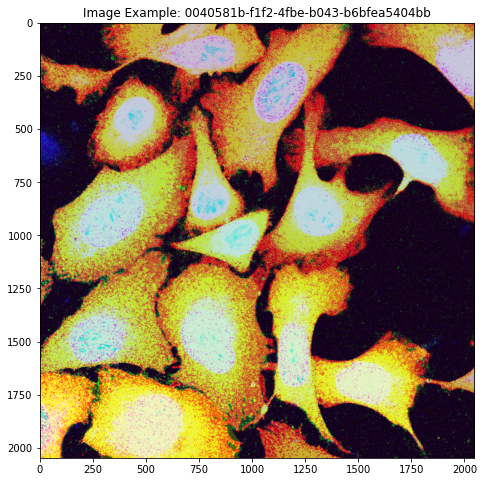

0 0.6495221820770729 eNq1Vtty4jAM/SUUe+lLp53Z7swOtVGAUBwn5EIgN275/7e1EsKtTaHtrE2SY0uWbelYJvw1YqMd9Opi11+wm/ex1jJAQtbQwjPJmdymcfWPau9k4n1/VzmpXCoCWqZCs4iP9O16UacdnJZVv7vsHs18NHnbbnd51t/Ybaaw4XZtnVvrf2Hf7T7Mg9a5/Gp/V23bav3V4Zejvc/lBh/k1/68jEfHtpt9NYs+G1/bPsgPrLkgm+nptePgM/3m7Q4Cexpi0tsvILJHIT47CfzeBPg0S+ClDPDRTeCvrzC3FIuHcQo7K/JwMkxSqKzAw9FwlYLDtIdbWaTgs7GHKznKIGCVxqUcZxCyvcaFdDJI2FpjIFUGJUs0KhllsGaxxpmMM9iwSOObXGSwZYHGqVxlsGdaoyNzQkrjRK4zqNhU41juMpjwvYuVcHJw+NrFrXBzeOOZi2sxz0HxpYuFCHPQPHYxF4scPB64mIlVDj73XExFnsOcK0IloSmhHaExoYpQpXAlJgUEfKcwEdMCIr5RGItZAQteKIyELiDhKSGf0FJhKMIClnyhcC7iAlIeKvTFsoCM+4RSQppQTkgp9MSa0JRGbGnEhNC+gBUfKwxERWg3M3M4pZljTUgRymdG6pdGupyZEWFprEQzYy8poeTuDLUoSwh/Qcf5vtm+Ok839E7HtstOl737ynW++a7+LTuf57XrUr0a50csMI6WJSETmlhuCL0RosAxh6QmmAtmgjmXb4ZYzATdlyb8KSsL8KQmlKyhma72T31ie/Ux/igEbao6Jq1DarIOSaitzc3T6h3SAp5CdSE/Ji84zns9j3lesoGhq9c3dM0GjiFzf2eIOzDEDQgtCYV9Q+FkYHYd9StCxhNJf1LCQ9f9cFbZ8OT9e+P3VX7c5uO95+Mn/PnOun42vvuc3jvf/1lXUzziSdSfl4aieCDzkdxfyl/v/05cyOsbsjkSF/e61d6dtZQ

In [23]:
df = convert_sample_submission()

# Iterate over test dataframce
for ii, image in df.iterrows():
    # break in testing
    if ii == 1:
        break

    print('#####################################################')
    # get individual image ID
    ID = image.ID
    print('Segmenting image {}'.format(ID))
    # segment and extract
    r, g, b, y = read_image_array(ID)
    ref_channels = [r, y, b]
    mask = segment(ref_channels, segmentator)
    predicted_string = extract_and_predict((r, g, b, y), mask)
    
    # plot 
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(np.dstack((r, g, b)))
    ax.imshow(mask, alpha=0.3)
    plt.title('Image Example: {}'.format(ID))
    plt.show()
    print(predicted_string)